Name: Ahmet Boran Özüm
Student Id: 2380814

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.signal
import time

In [2]:
chessboard = cv2.imread('chessboard.png')
agac = cv2.imread('agac.png')
chessboard_rotated = cv2.imread('chessboardrotated.png')
agac_rotated = cv2.imread('agacrotated.png')
lab_rotated = cv2.imread('labrotated.png')
lab = cv2.imread('lab.png')

### Task 1: Naive Formula + Uniform Weighting

In [3]:
def naive_uniform(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    window = np.ones((3,3))
    
    res = np.zeros(img_gray.shape)
#     for key, value in shift_kernels.items():
# #         shift = (img_gray - scipy.signal.convolve2d(img_gray, value, mode='same', boundary='symm'))**2
# #         res += scipy.signal.convolve2d(shift, window, mode='same', boundary='fill', fillvalue=0)

#         org = cv2.filter2D(src=img_gray, ddepth=-1, kernel=window)
#         shift = cv2.filter2D(src=img_gray, ddepth=-1, kernel=value)
#         shift = cv2.filter2D(src=shift, ddepth=-1, kernel=window)
        
#         dif = (org-shift)**2
        
#         res += dif

    for y in range(2,len(img_gray)-2):
        for x in range(2,len(img_gray[0])-2):
            
            total_sum = 0
            original_window = img_gray[y-1:y+2, x-1:x+2]
            for u in range(-1,2):
                for v in range(-1,2):
                    if u==0 and v==0:
                        continue
                    shifted_window = img_gray[y+u-1:y+u+2, x+v-1: x+v+2]
                    diff = original_window-shifted_window
                    diff_squared = np.square(diff)
                    total_sum += np.sum(diff_squared)
            
            res[y][x] = total_sum
            
                
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 5.046353
Time elapsed for rotated chessboard 5.153779
Time elapsed for agac 5.053216
Time elapsed for rotated agac 5.050976
Time elapsed for lab 5.046611
Time elapsed for rotated lab 5.016247


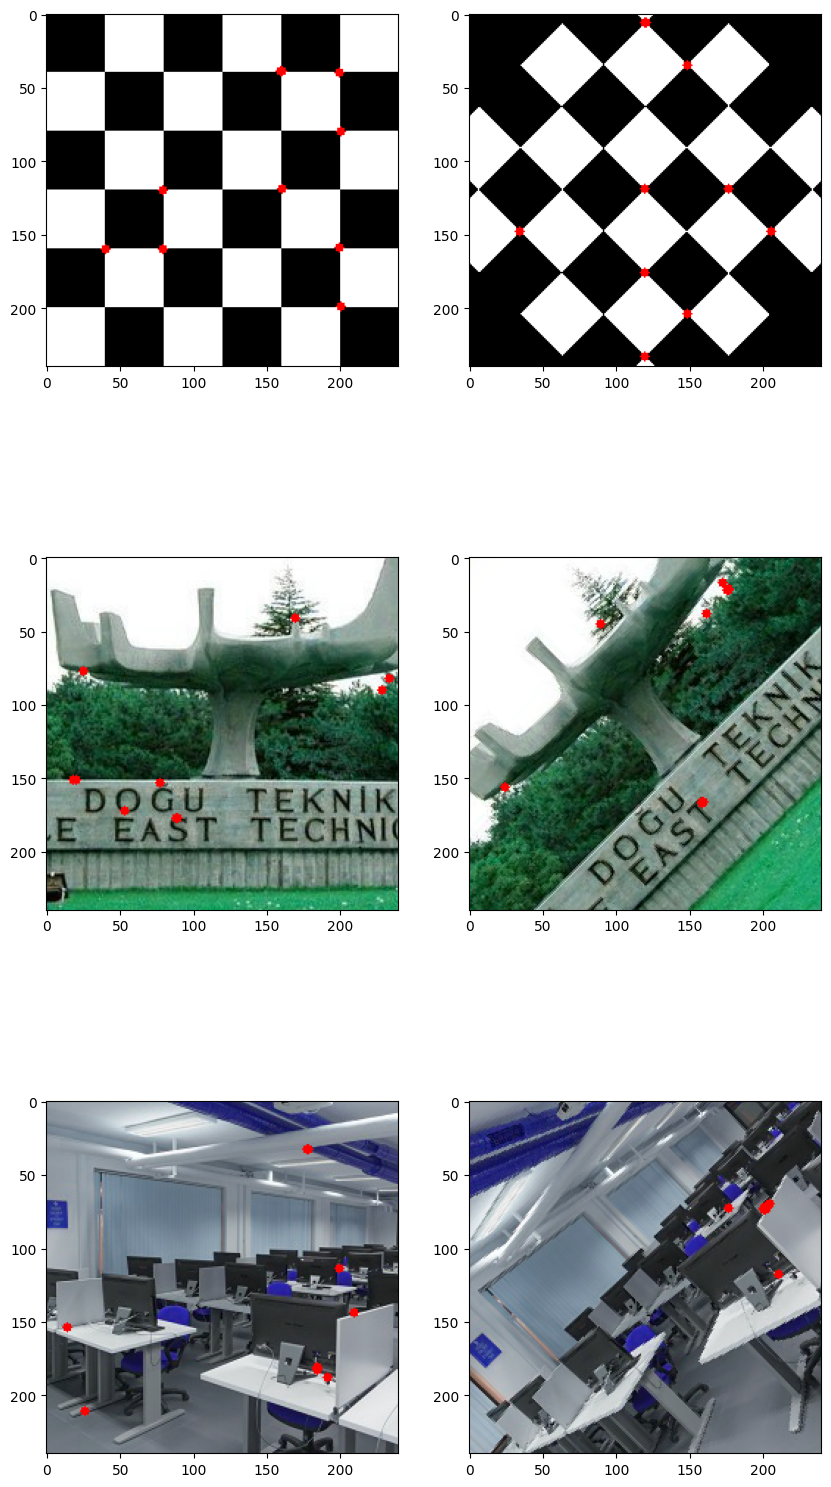

In [4]:
## Write your code here

fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(naive_uniform(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(naive_uniform(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(naive_uniform(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))


fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(naive_uniform(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))


fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(naive_uniform(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(naive_uniform(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [ ]:
## This part is for discussion



### Task2: Naive Formula + Uniform Weighting + Non-Maximum Suppression

In [5]:
## Write your code here

def naive_uniform_nonmax(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    window = np.ones((3,3))
    
    res = np.zeros(img_gray.shape)
#     for key, value in shift_kernels.items():
# #         shift = (img_gray - scipy.signal.convolve2d(img_gray, value, mode='same', boundary='symm'))**2
# #         res += scipy.signal.convolve2d(shift, window, mode='same', boundary='fill', fillvalue=0)

#         org = cv2.filter2D(src=img_gray, ddepth=-1, kernel=window)
#         shift = cv2.filter2D(src=img_gray, ddepth=-1, kernel=value)
#         shift = cv2.filter2D(src=shift, ddepth=-1, kernel=window)
        
#         dif = (org-shift)**2
        
#         res += dif

    for y in range(2,len(img_gray)-2):
            for x in range(2,len(img_gray[0])-2):

                total_sum = 0
                original_window = img_gray[y-1:y+2, x-1:x+2]
                for u in range(-1,2):
                    for v in range(-1,2):
                        if u==0 and v==0:
                            continue
                        shifted_window = img_gray[y+u-1:y+u+2, x+v-1: x+v+2]
                        diff = original_window-shifted_window
                        diff_squared = np.square(diff)
                        total_sum += np.sum(diff_squared)

                res[y][x] = total_sum
    
    for y in range(10,len(res)-10):
        for x in range(10,len(res[0])-10):
            local_max = 0
            max_x = 0
            max_y = 0
            
            for u in range(-10,11):
                for v in range(-10,11):
                    if res[y+u][x+v] >= local_max:
                        local_max = res[y+u][x+v]
                        max_y = y+u
                        max_x = x+v
                    res[y+u][x+v] = 0
            
            res[max_y][max_x] = local_max
    plt.imshow(res)      
                    
    
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy


Time elapsed for chessboard 16.073621
Time elapsed for rotated chessboard 17.117548
Time elapsed for agac 16.464838
Time elapsed for rotated agac 16.882297
Time elapsed for lab 16.482593
Time elapsed for rotated lab 15.915204


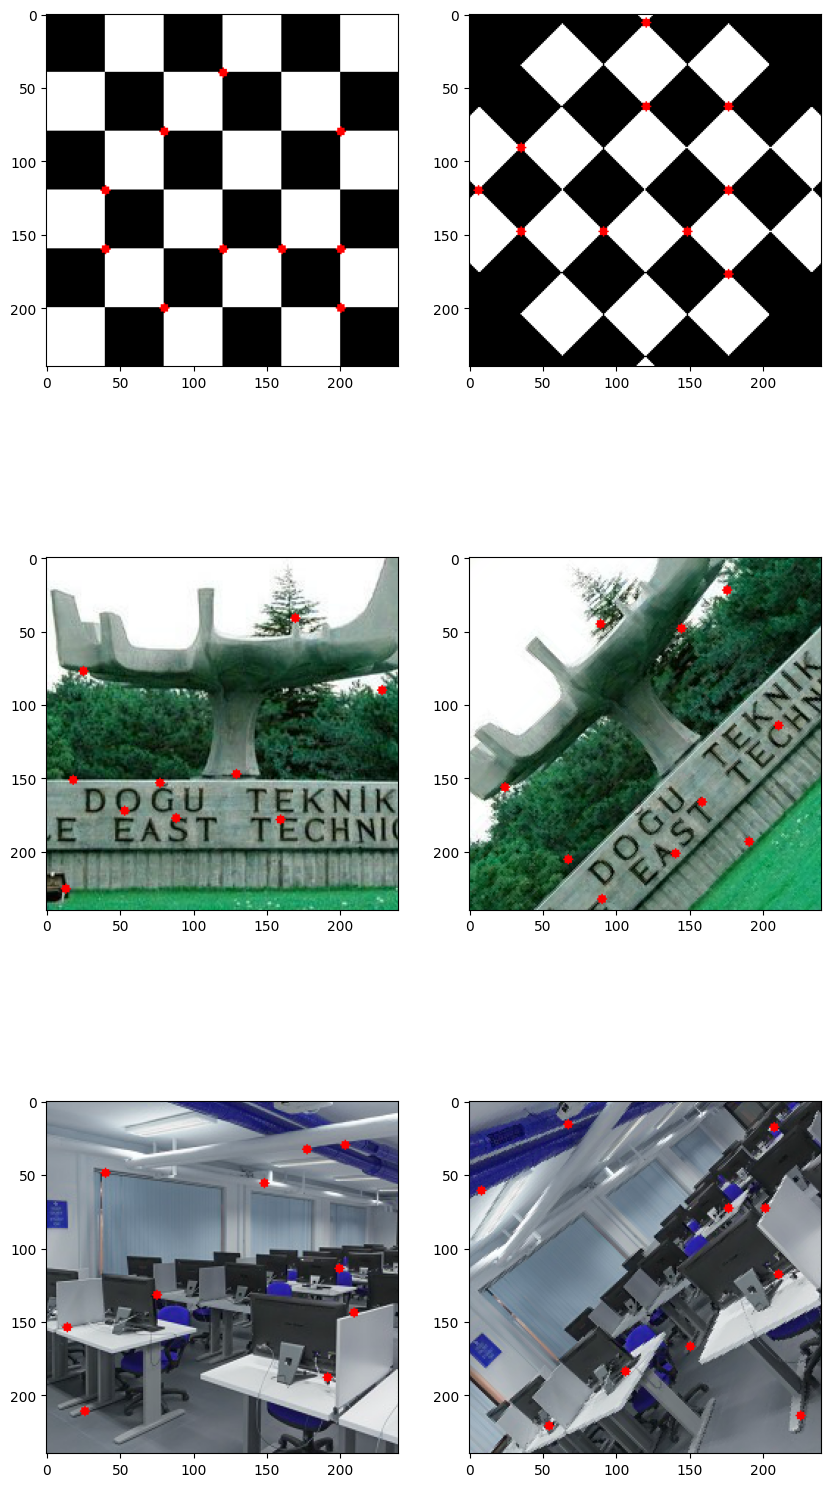

In [19]:
## Write your code here

fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(naive_uniform_nonmax(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(naive_uniform_nonmax(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(naive_uniform_nonmax(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))


fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(naive_uniform_nonmax(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))


fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(naive_uniform_nonmax(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(naive_uniform_nonmax(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [ ]:
## This part is for discussion



### Task3: Taylor's Approximation + Uniform Weighting + Non-Maximum Suppression

In [51]:
## Write your code here

sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y = sobel_x.T

def taylor_uniform_nonmax(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
#     I_x = cv2.filter2D(src=img_gray, ddepth=-1, kernel=sobel_x)
#     I_y = cv2.filter2D(src=img_gray, ddepth=-1, kernel=sobel_y)
    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same')
    I_x_I_y = I_x*I_y
    I_x_squared = np.square(I_x)
    I_y_squared = np.square(I_y)
    
    res = np.zeros(img_gray.shape)
    for y in range(1,len(res)-1):
        for x in range(1,len(res[0])-1):
            total_sum = 0
            ix = I_x_squared[y-1:y+2, x-1:x+2]
            iy = I_y_squared[y-1:y+2, x-1:x+2]
            ixiy = I_x_I_y[y-1:y+2, x-1:x+2]
                
            for u in range(-1,2,2):
                for v in range(-1,2,2):
                    for wy in range(3):
                        for wx in range(3):
                            H = np.array([[ix[wy][wx], ixiy[wy][wx]], [ixiy[wy][wx], iy[wy][wx]]])
                            mul = np.matmul(np.array([u,v]), H)
                            mul = np.matmul(mul, np.array([[u],[v]]))
                            total_sum += mul[0]
            
            res[y][x] = total_sum
            
    for y in range(5,len(res)-5):
        for x in range(5,len(res[0])-5):
            local_max = 0
            max_x = 0
            max_y = 0
            
            for u in range(-5,6):
                for v in range(-5,6):
                    if res[y+u][x+v] >= local_max:
                        local_max = res[y+u][x+v]
                        max_y = y+u
                        max_x = x+v
                    res[y+u][x+v] = 0
            
            res[max_y][max_x] = local_max 
            
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 20.537071
Time elapsed for rotated chessboard 20.330206
Time elapsed for agac 20.047867
Time elapsed for rotated agac 20.071168
Time elapsed for lab 20.167182
Time elapsed for rotated lab 19.957866


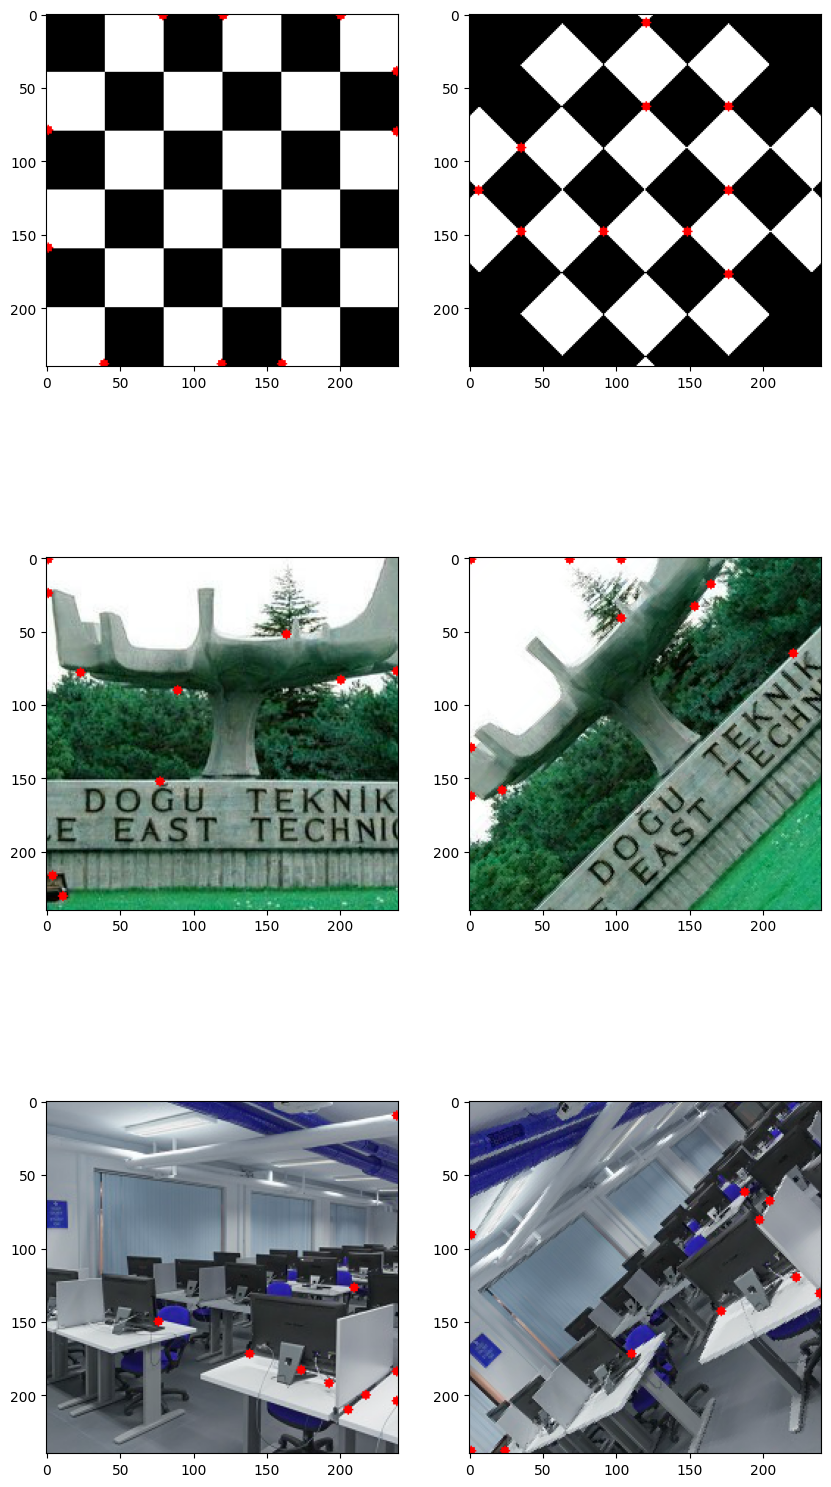

In [52]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(taylor_uniform_nonmax(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(taylor_uniform_nonmax(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(taylor_uniform_nonmax(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(taylor_uniform_nonmax(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(taylor_uniform_nonmax(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(taylor_uniform_nonmax(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [ ]:
## This part is for discussion



### Task 4: Smaller Eigenvalue as corner score + Uniform Weighting + Non-Maximum Suppression

In [28]:
2## Write your code here
def smaller_eigenvalues(img):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = sobel_x.T

#     I_x = cv2.filter2D(src=img_gray, ddepth=-1, kernel=sobel_x)
#     I_y = cv2.filter2D(src=img_gray, ddepth=-1, kernel=sobel_y)

    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same', boundary='symm')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same', boundary='symm')
    I_x_I_y = I_x * I_y
    I_x_squared = np.square(I_x)
    I_y_squared = np.square(I_y)

    res = np.zeros(img_gray.shape)
    for y in range(1, len(res) - 1):
        for x in range(1, len(res[0]) - 1):
            total_sum = 0
            ix = I_x_squared[y - 1:y + 2, x - 1:x + 2]
            iy = I_y_squared[y - 1:y + 2, x - 2:x + 2]
            ixiy = I_x_I_y[y - 2:y + 2, x - 1:x + 2]

            sum_ix = np.sum(ix)
            sum_iy = np.sum(iy)
            sum_ixiy = np.sum(ixiy)

            H = np.array([[sum_ix, sum_ixiy], [sum_ixiy, sum_iy]])
            eigenvalues = np.linalg.eigvals(H)

            if eigenvalues[0] < eigenvalues[1]:
                if eigenvalues[0] > 2:
                    res[y][x] = eigenvalues[0]
            else:
                if eigenvalues[1] > 2:
                    res[y][x] = eigenvalues[1]
            

    for y in range(5, len(res) - 5):
        for x in range(5, len(res[0]) - 5):
            local_max = 0
            max_x = 0
            max_y = 0

            for u in range(-5, 6):
                for v in range(-5, 6):
                    if res[y + u][x + v] >= local_max:
                        local_max = res[y + u][x + v]
                        max_y = y + u
                        max_x = x + v
                    res[y + u][x + v] = 0

            res[max_y][max_x] = local_max

    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y, x], 3, (255, 0, 0), -1)

    return img_copy

Time elapsed for chessboard 6.214259
Time elapsed for rotated chessboard 6.284834
Time elapsed for agac 6.078744
Time elapsed for rotated agac 6.084525
Time elapsed for lab 6.054186
Time elapsed for rotated lab 6.101826


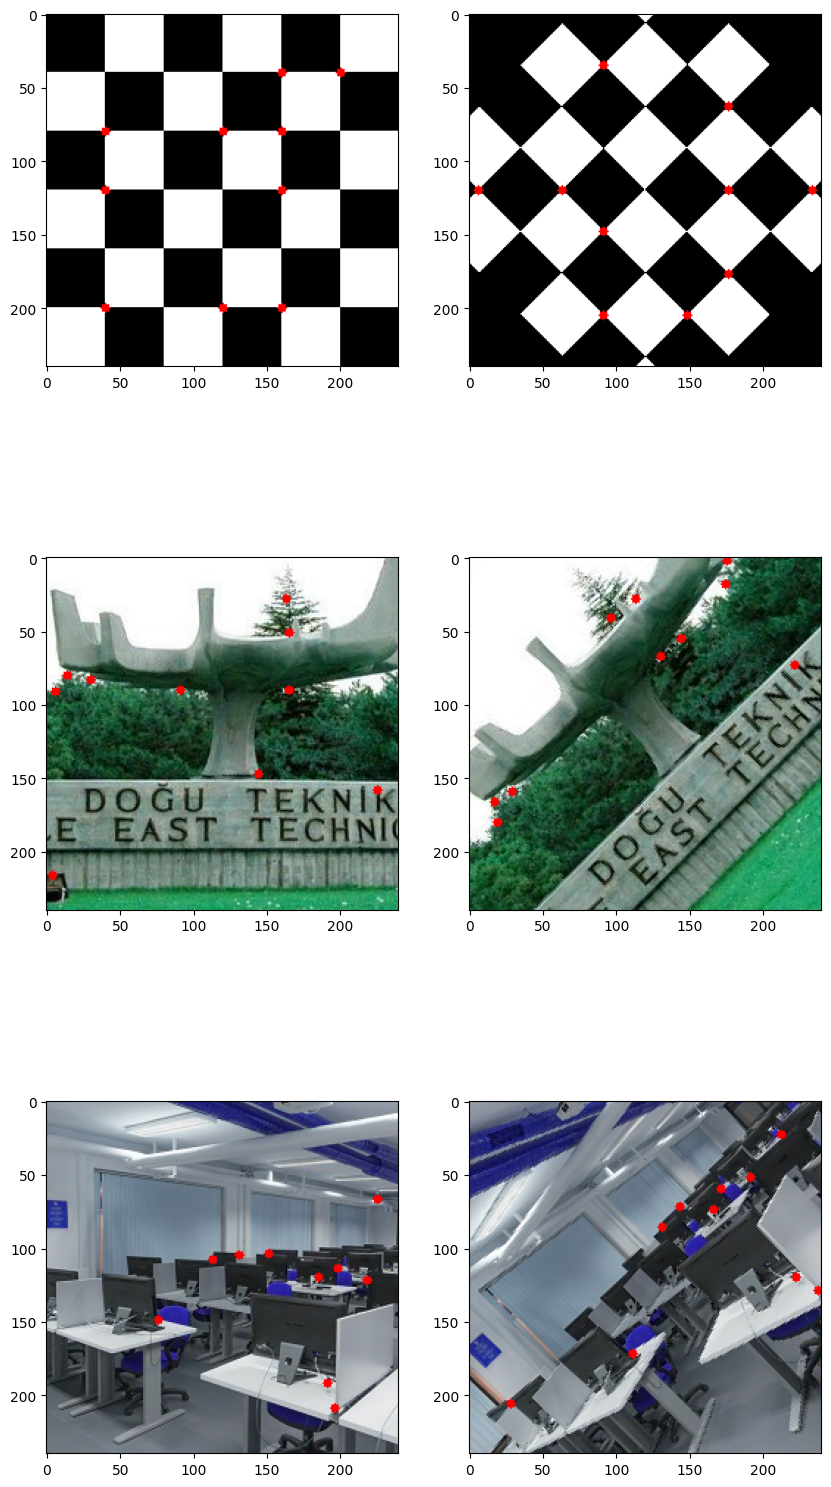

In [55]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(smaller_eigenvalues(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(smaller_eigenvalues(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(smaller_eigenvalues(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(smaller_eigenvalues(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(smaller_eigenvalues(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(smaller_eigenvalues(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))

In [54]:
## This part is for discussion



### Task 5: R function as corner score + Uniform Weighting + Non-Maximum Suppression

In [56]:
## Write your code here
def rFunction(img):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = sobel_x.T

    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same', boundary='symm')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same', boundary='symm')
    I_x_I_y = I_x * I_y
    I_x_squared = np.square(I_x)
    I_y_squared = np.square(I_y)

    k = 0.04

    res = np.zeros(img_gray.shape)

    for y in range(1, len(res) - 1):
        for x in range(1, len(res[0]) - 1):
            total_sum = 0
            ix = I_x_squared[y - 1:y + 2, x - 1:x + 2]
            iy = I_y_squared[y - 1:y + 2, x - 1:x + 2]
            ixiy = I_x_I_y[y - 1:y + 2, x - 1:x + 2]

            sum_ix = np.sum(ix)
            sum_iy = np.sum(iy)
            sum_ixiy = np.sum(ixiy)

            H = np.array([[sum_ix, sum_ixiy], [sum_ixiy, sum_iy]])
            det = np.linalg.det(H)
            trace = np.trace(H)
            res[y][x] = det - k * np.square(trace)
            
    for y in range(5, len(res) - 5):
        for x in range(5, len(res[0]) - 5):
            local_max = 0
            max_x = 0
            max_y = 0

            for u in range(-5, 6):
                for v in range(-5, 6):
                    if res[y + u][x + v] >= local_max:
                        local_max = res[y + u][x + v]
                        max_y = y + u
                        max_x = x + v
                    res[y + u][x + v] = 0

            res[max_y][max_x] = local_max

    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y, x], 3, (255, 0, 0), -1)

    return img_copy

Time elapsed for chessboard 5.857025
Time elapsed for rotated chessboard 6.015327
Time elapsed for agac 5.757852
Time elapsed for rotated agac 5.706884
Time elapsed for lab 5.736365
Time elapsed for rotated lab 5.671561


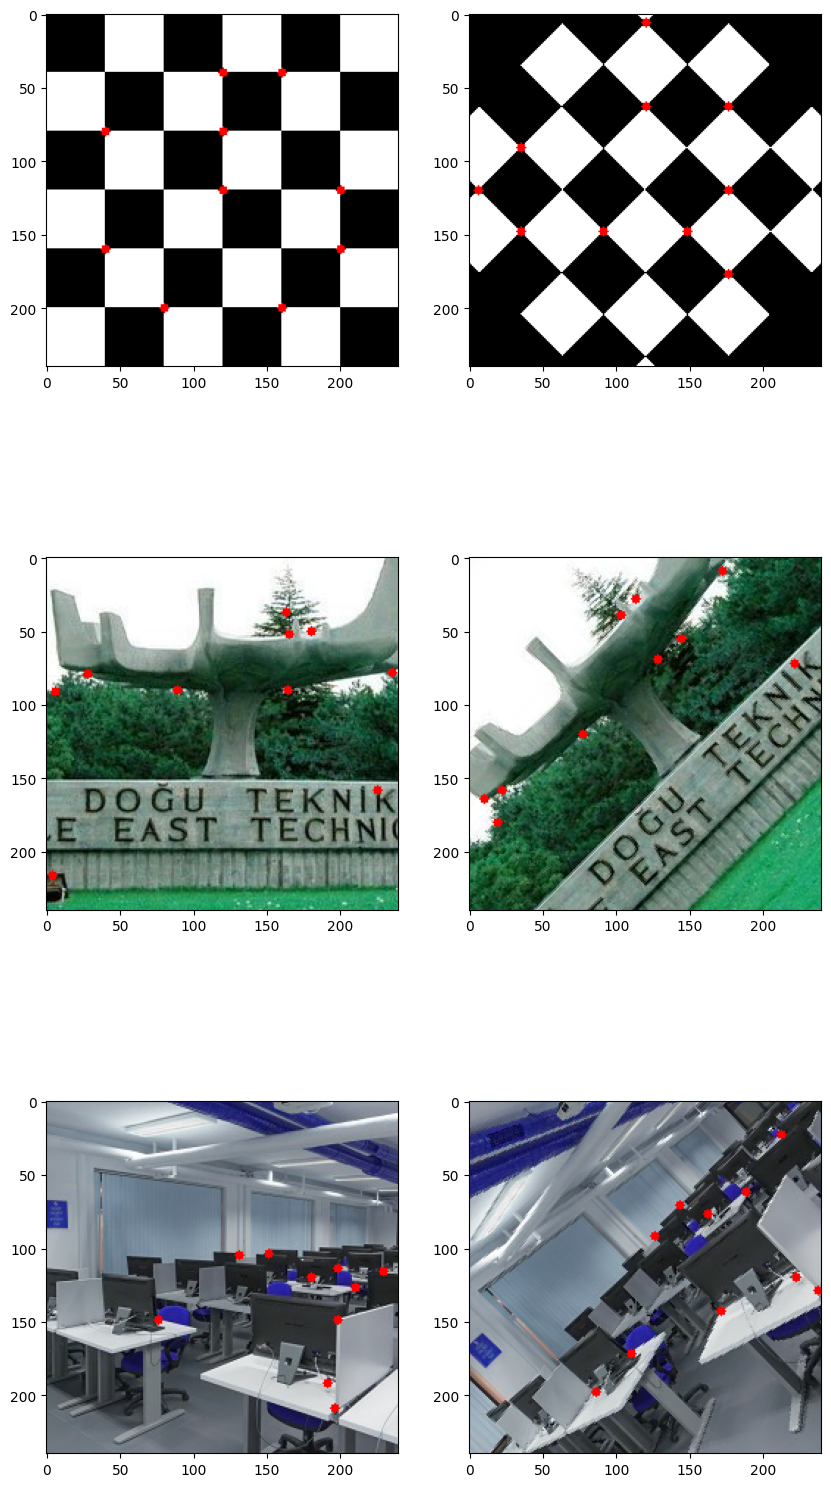

In [58]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(rFunction(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(rFunction(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(rFunction(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(rFunction(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(rFunction(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(rFunction(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))

In [ ]:
## This part is for discussion



### Task 6: R function with fast windowing based on fitering + Uniform Weighting + Non-Maximum Suppression

In [67]:
## Write your code here

def option1(img):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = sobel_x.T

    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same')
    I_x_square = np.square(I_x)
    I_y_square = np.square(I_y)
    I_xy = I_x * I_y

    convolvedI_x_square = scipy.signal.convolve2d(I_x_square, np.ones((3, 3)), mode='same')
    convolvedI_y_square = scipy.signal.convolve2d(I_y_square, np.ones((3, 3)), mode='same')
    convolvedI_xy = scipy.signal.convolve2d(I_xy, np.ones((3, 3)), mode='same')

    det_matrix = convolvedI_x_square * convolvedI_y_square - convolvedI_xy * convolvedI_xy
    trace_matrix = convolvedI_x_square + convolvedI_y_square
    
    res = det_matrix - 0.04 * np.square(trace_matrix)

    for y in range(5, len(res) - 5):
        for x in range(5, len(res[0]) - 5):
            local_max = 0
            max_x = 0
            max_y = 0

            for u in range(-5, 6):
                for v in range(-5, 6):
                    if res[y + u][x + v] >= local_max:
                        local_max = res[y + u][x + v]
                        max_y = y + u
                        max_x = x + v
                    res[y + u][x + v] = 0

            res[max_y][max_x] = local_max

    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y, x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 3.909252
Time elapsed for rotated chessboard 3.900149
Time elapsed for agac 3.692196
Time elapsed for rotated agac 3.674378
Time elapsed for lab 3.853572
Time elapsed for rotated lab 3.608986


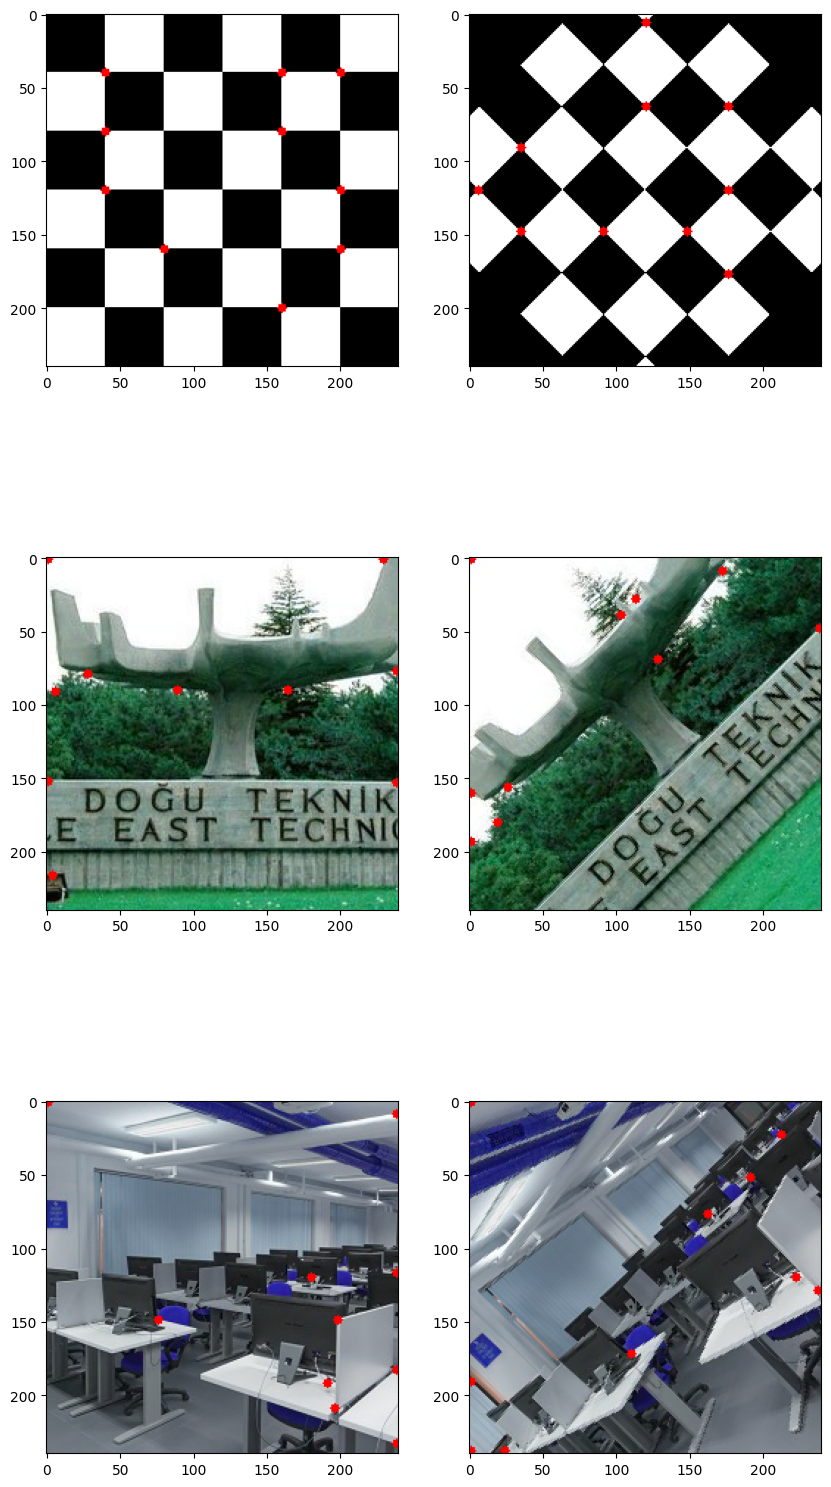

In [78]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(option1(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(option1(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(option1(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(option1(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(option1(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(option1(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))

In [77]:
## This part is for discussion


### Task 7: R function with fast windowing based on fitering + Gaussian Weighting + Non-Maximum Suppression

In [75]:
## Write your code here
def gaussianKernel(size, sigma=1):
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

def option2(img):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = sobel_x.T

    I_x = scipy.signal.convolve2d(img_gray, sobel_x, mode='same')
    I_y = scipy.signal.convolve2d(img_gray, sobel_y, mode='same')
    I_x_square = np.square(I_x)
    I_y_square = np.square(I_y)
    I_xy = I_x * I_y
    
    gaussian_kernel = gaussianKernel(3, 1)
    
    gaussian_I_x_squared = scipy.signal.convolve2d(I_x_square, gaussian_kernel, mode='same')
    gaussian_I_y_squared = scipy.signal.convolve2d(I_y_square, gaussian_kernel, mode='same')
    gaussian_I_xy = scipy.signal.convolve2d(I_xy, gaussian_kernel, mode='same')
    
    det_matrix = (gaussian_I_x_squared * gaussian_I_y_squared) - (gaussian_I_xy**2)
    trace_matrix = gaussian_I_x_squared + gaussian_I_y_squared
    
    res = det_matrix - 0.04*np.square(trace_matrix)
    for y in range(5, len(res) - 5):
        for x in range(5, len(res[0]) - 5):
            local_max = 0
            max_x = 0
            max_y = 0

            for u in range(-5, 6):
                for v in range(-5, 6):
                    if res[y + u][x + v] >= local_max:
                        local_max = res[y + u][x + v]
                        max_y = y + u
                        max_x = x + v
                    res[y + u][x + v] = 0

            res[max_y][max_x] = local_max

    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y, x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 3.883136
Time elapsed for rotated chessboard 3.890323
Time elapsed for agac 3.652768
Time elapsed for rotated agac 3.646648
Time elapsed for lab 3.825676
Time elapsed for rotated lab 3.766420


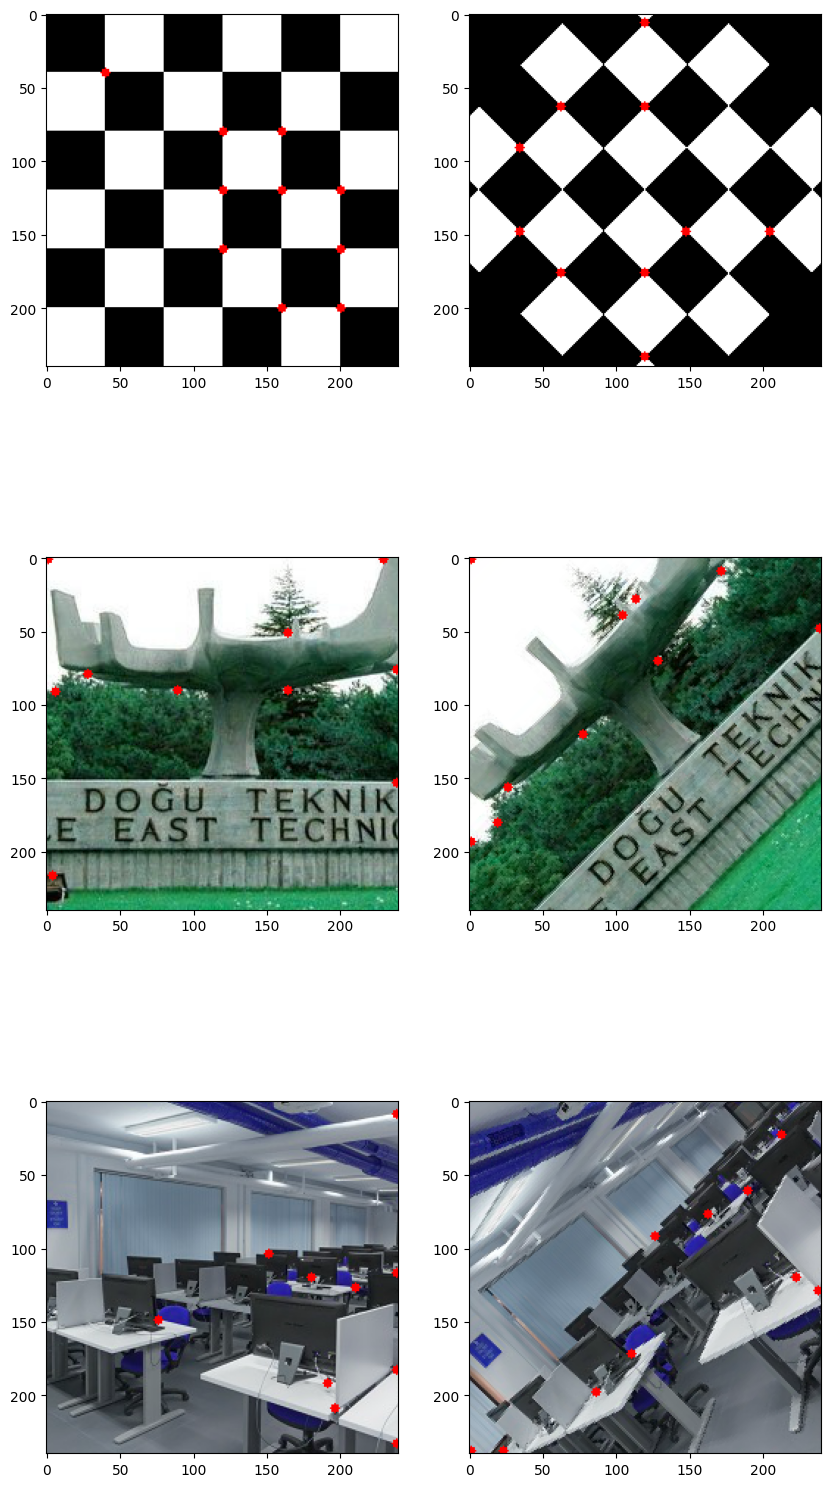

In [76]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(option2(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(option2(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(option2(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(option2(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(option2(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(option2(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))

In [ ]:
## This part is for discussion

